## Model 1: Linear Regression

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

In [2]:
df_linear = pd.read_csv(r"https://raw.githubusercontent.com/Mlzzzzz/MSU_CMSE830_Webapp/main/Datasets/preprocessed_dataset.csv")
features_linear = df_linear[["tanimoto_cdk_Extended", "TanimotoCombo"]]
targets_linear = df_linear[["frac_similar"]].values

In [3]:
model = LinearRegression()
model.fit(features_linear, targets_linear)

LinearRegression()

F:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



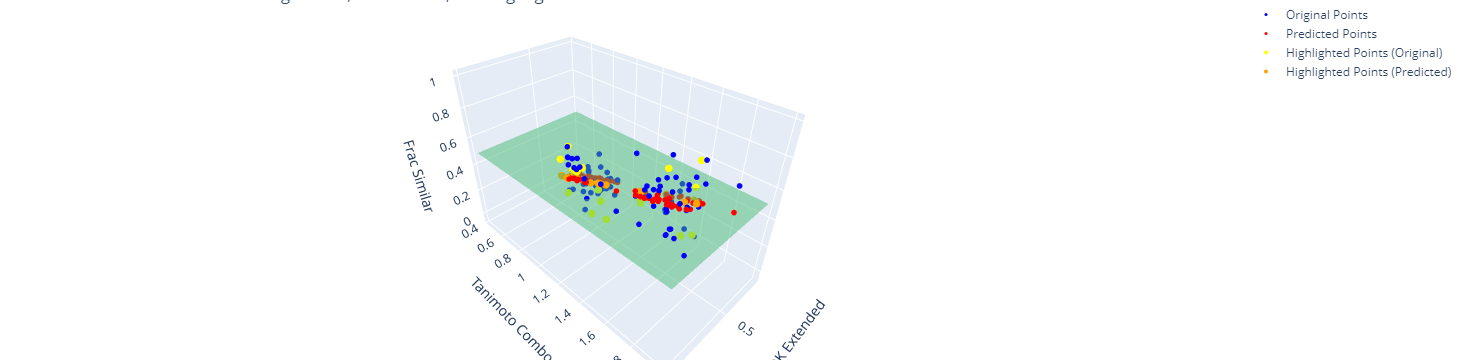

In [13]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Assuming df_linear is your DataFrame
# df_linear = pd.read_csv('your_csv_file.csv')  # Uncomment this line to load data from CSV

# Fit the Linear Regression model
model = LinearRegression()
model.fit(df_linear[['tanimoto_cdk_Extended', 'TanimotoCombo']], df_linear['frac_similar'])

# Predictions for each point
df_linear['predicted'] = model.predict(df_linear[['tanimoto_cdk_Extended', 'TanimotoCombo']])

# Identify points on different sides of z=0.5
df_linear['highlight'] = ((df_linear['frac_similar'] < 0.5) & (df_linear['predicted'] >= 0.5)) | \
                         ((df_linear['frac_similar'] >= 0.5) & (df_linear['predicted'] < 0.5))

# Prepare meshgrid for regression surface
x_range = np.linspace(df_linear['tanimoto_cdk_Extended'].min(), df_linear['tanimoto_cdk_Extended'].max(), 100)
y_range = np.linspace(df_linear['TanimotoCombo'].min(), df_linear['TanimotoCombo'].max(), 100)
xx, yy = np.meshgrid(x_range, y_range)
zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Create figure
fig = go.Figure()

# Add scatter plot of original points
fig.add_trace(go.Scatter3d(
    x=df_linear['tanimoto_cdk_Extended'],
    y=df_linear['TanimotoCombo'],
    z=df_linear['frac_similar'],
    mode='markers',
    marker=dict(size=3, color='blue'),
    name='Original Points'
))

# Add scatter plot of predicted points
fig.add_trace(go.Scatter3d(
    x=df_linear['tanimoto_cdk_Extended'],
    y=df_linear['TanimotoCombo'],
    z=df_linear['predicted'],
    mode='markers',
    marker=dict(size=3, color='red'),
    name='Predicted Points'
))

# Add scatter plot of highlighted points (on different sides of z=0.5)
fig.add_trace(go.Scatter3d(
    x=df_linear[df_linear['highlight']]['tanimoto_cdk_Extended'],
    y=df_linear[df_linear['highlight']]['TanimotoCombo'],
    z=df_linear[df_linear['highlight']]['frac_similar'],
    mode='markers',
    marker=dict(size=4, color='yellow'),
    name='Highlighted Points (Original)'
))

# Add scatter plot of highlighted points (on different sides of z=0.5) for Predicted
fig.add_trace(go.Scatter3d(
    x=df_linear[df_linear['highlight']]['tanimoto_cdk_Extended'],
    y=df_linear[df_linear['highlight']]['TanimotoCombo'],
    z=df_linear[df_linear['highlight']]['predicted'],
    mode='markers',
    marker=dict(size=4, color='orange'),
    name='Highlighted Points (Predicted)'
))

# Adjusted code to add plane at z=0.5
x_plane = np.linspace(df_linear['tanimoto_cdk_Extended'].min(), df_linear['tanimoto_cdk_Extended'].max(), 10)
y_plane = np.linspace(df_linear['TanimotoCombo'].min(), df_linear['TanimotoCombo'].max(), 10)
xx_plane, yy_plane = np.meshgrid(x_plane, y_plane)
zz_plane = np.full(xx_plane.shape, 0.5)

fig.add_trace(go.Surface(
    x=xx_plane,
    y=yy_plane,
    z=zz_plane,
    name='Plane at z=0.5',
    showscale=False,
    opacity=0.7,
    colorscale=[[0, 'rgba(50, 171, 96, 0.7)'], [1, 'rgba(50, 171, 96, 0.7)']]
))

# Update layout
fig.update_layout(
    title='Interactive 3D Plot with Regression, z=0.5 Plane, and Highlighted Points',
    scene=dict(
        xaxis_title='Tanimoto CDK Extended',
        yaxis_title='Tanimoto Combo',
        zaxis_title='Frac Similar'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()
